data analysis

In [1]:
# required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import seaborn as sns

In [2]:
# reading data of 100 kb resolution interchromosomal contacts
raw_data = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_2_100kb.RAWobserved', header=None)
KRnorm_vector_1 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr1_100kb.KRnorm', header=None)
KRnorm_vector_2 = pd.read_table(
    './data/GM12878_primary_interchromosomal/100kb_resolution_interchromosomal/chr1_chr2/MAPQGE30/chr2_100kb.KRnorm', header=None)

In [3]:
# rename columns
raw_data.columns = ['coord1', 'coord2', 'value']

In [4]:
# create temporary dataset for KR normalized data
KRnorm_data_temp = raw_data.copy()
KRnorm_data_temp['coord1'] = (raw_data['coord1']/100000)+1
KRnorm_data_temp['coord2'] = (raw_data['coord2']/100000)+1
KRnorm_data_temp.head()

,coord1,coord2,value
0,9.0,1.0,3.0
1,12.0,1.0,3.0
2,14.0,1.0,1.0
3,16.0,1.0,1.0
4,18.0,1.0,1.0


In [9]:
# rename column of normalization vector
KRnorm_vector_1.rename(columns={0:'coef'}, inplace=True)
KRnorm_vector_2.rename(columns={0:'coef'}, inplace=True)

In [10]:
# access to normalization coefficients
KRnorm_data_temp.insert(1, 'coord1_coef', [KRnorm_vector_1.coef.iloc[int(i)] for i in KRnorm_data_temp.coord1])
KRnorm_data_temp.insert(3, 'coord2_coef', [KRnorm_vector_2.coef.iloc[int(i)] for i in KRnorm_data_temp.coord2])

ValueError: cannot insert coord1_coef, already exists

In [11]:
KRnorm_data_temp.insert(5, 'KRnorm_value', KRnorm_data_temp.value/(KRnorm_data_temp.coord1_coef*KRnorm_data_temp.coord2_coef))


ValueError: cannot insert KRnorm_value, already exists

In [18]:
# creating actual KR normalized dataset
KRnorm_data = raw_data[['coord1', 'coord2']]
KRnorm_data.insert(2, 'value', KRnorm_data_temp.KRnorm_value)
KRnorm_data

,coord1,coord2,value
0,800000,0,3.879847
1,1100000,0,4.118880
2,1300000,0,1.491911
3,1500000,0,1.940752
4,1700000,0,1.218655
5,1800000,0,2.398326
6,2200000,0,1.040622
7,2400000,0,1.234796
8,2700000,0,2.511694
9,2800000,0,1.209241


In [19]:
# function that returns subset by evaluated cut-off according defining percentage
def find_cutoff(data, percent):
    
    ### dataset = raw dataset with i,j,Mij named 'coord1','coord2','value' ###
    ### percent = 1 = 1%, 5 = 5% and etc ###
    #data.columns = ['coord1', 'coord2', 'value']
    counts = data['value'].value_counts().to_dict()
    count_data = pd.DataFrame(list(counts.items()), columns = ['value', 'frequency'])
    sorted_count_data = count_data.sort_values(by=['frequency'])
    sort_data = sorted_count_data.sort_values(by=['value'], ascending=False)
    
    
    data_matrix = np.matrix(sort_data)
    number_of_contacts = len(data)
    #print(number_of_contacts)
    percentage = round(number_of_contacts*(percent/100))
    #print(percentage)
    freq_sum = 0
    
    for element in data_matrix:
        #print(element[0,1])
        freq_sum += element[0,1]
        #print(freq_sum)
        if freq_sum >= percentage:
            return data[data.value >= element[0,0]]

In [20]:
raw_subset = find_cutoff(raw_data, 1)
KRnorm_subset = find_cutoff(KRnorm_data, 1)


In [21]:
raw_subset


,coord1,coord2,value
6785,5300000,1600000,11.0
6787,5500000,1600000,9.0
15702,6200000,3600000,8.0
17375,50500000,3900000,8.0
28413,70800000,7000000,8.0
28625,24600000,7100000,8.0
35130,46800000,8300000,8.0
36328,44400000,8500000,9.0
36639,8600000,8600000,8.0
36640,8700000,8600000,8.0


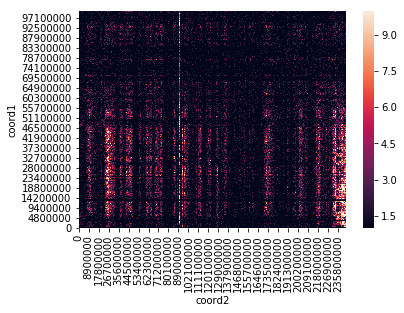

In [22]:
matr_data = raw_data.pivot('coord1', 'coord2', 'value').fillna(0)
ax = sns.heatmap(matr_data[:1000], vmin = 1, vmax = 10)
ax.invert_yaxis()


In [15]:
raw_data.insert(0, 'ID', range(0, len(raw_data)))

In [ ]:
plt.hist(raw_data['value'], raw_data['ID'])